<h1><center>Capstone project - breast cancer<center><h1>

<h3><center>Yanwen Gong<center><h3>
<h3><center>Dec 2018<center><h3>

<h3>__Data set description__<h3>

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

__Attribute information__:

__Ten real-valued features are computed for each cell nucleus:__
a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray- scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (# of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

__Class distribution:__ 357 benign, 212 malignant

### Data processing

__1. Load and inspect data__

In [135]:
## Load packages 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


data.csv



In [136]:
data = pd.read_csv('../input/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The key findings are column 32 is all NAs, which will not be included in further analysis. Column diagnosis is the target column, contain the diagnosis results - M or B.

In [137]:
## column 32 is all NAN, can be deleted during analysis 
data.iloc[:,32].unique()

data.iloc[:,1].unique()

array(['M', 'B'], dtype=object)

__2. Assess missing values__

There is no missing values in the data set.

In [138]:
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

__3. Standardize data__

In [139]:
## transform data for plotting
data_trans = data.drop(['id','diagnosis','Unnamed: 32'], axis=1)
data_trans = (data_trans - data_trans.mean()) / data_trans.std() ## standardization
data_trans['diagnosis'] = data.diagnosis
data_trans_melt = pd.melt(data_trans, id_vars = "diagnosis", var_name = "features", value_name = "value")


In [140]:
data_trans_melt.tail()

,diagnosis,features,value
17065,M,fractal_dimension_worst,-0.708467
17066,M,fractal_dimension_worst,-0.973122
17067,M,fractal_dimension_worst,-0.318129
17068,M,fractal_dimension_worst,2.217684
17069,B,fractal_dimension_worst,-0.750546


### Exploratory analysis 

__1. Visualize data__

Count is plot is to inspect the distribution of malignant vs benign.

In [141]:
## make diagnosis result in one list, features in one list
x = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data.diagnosis

Number of Benign:  357
Number of Malignant:  212


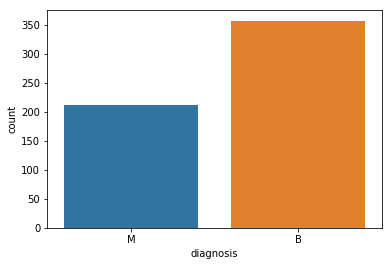

In [142]:
## Plot the count of each diagnosis
ax = sns.countplot(y, label='Count')
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant: ', M)

__Violin plot__ is used to exam the ditribution of each features. Features differ a lot between malignant and benign will be considered to include the the model.

Text(0.5,1,'Malignant vs Benign')

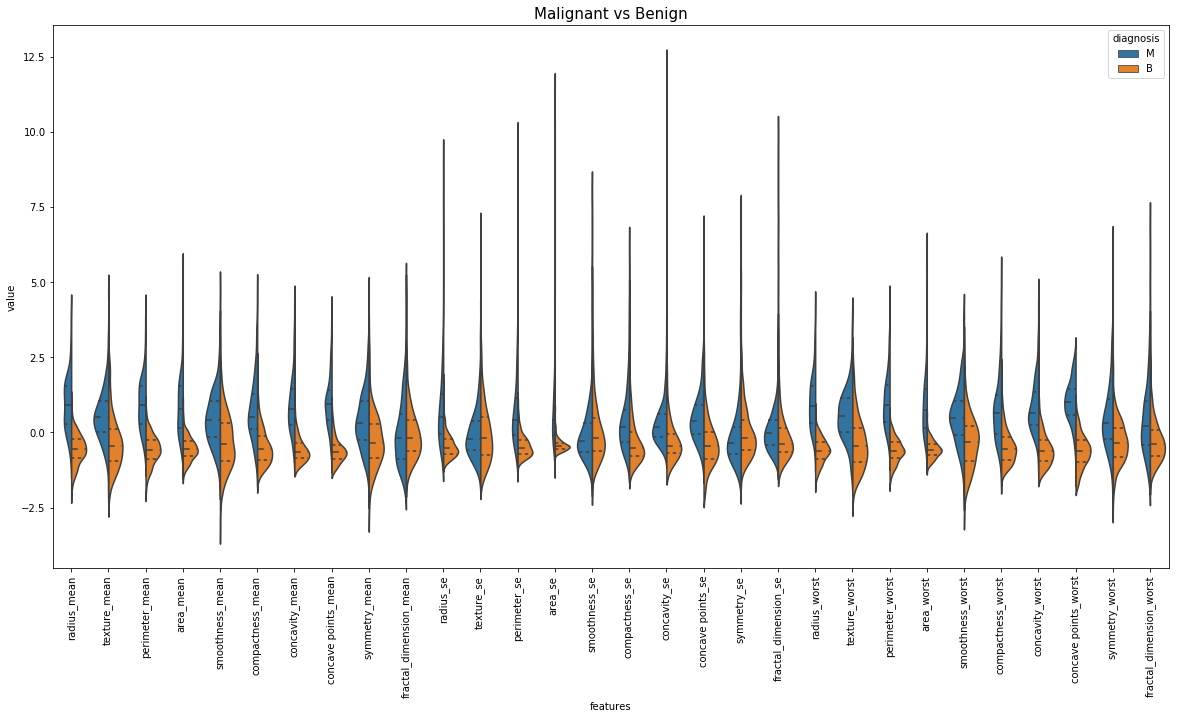

In [143]:
plt.figure(figsize = (20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_trans_melt, split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("Malignant vs Benign", fontdict={"fontsize":15})

- Based on the violin plot, benign samples in general have lower values than malignant
- There are lots of outliers of each feature
- Features with significant difference: radias_mean, concavity_mean, concave points points_mean, area_se, lots of features in "worst"

__Swarm__ plot is used to better visualize the data

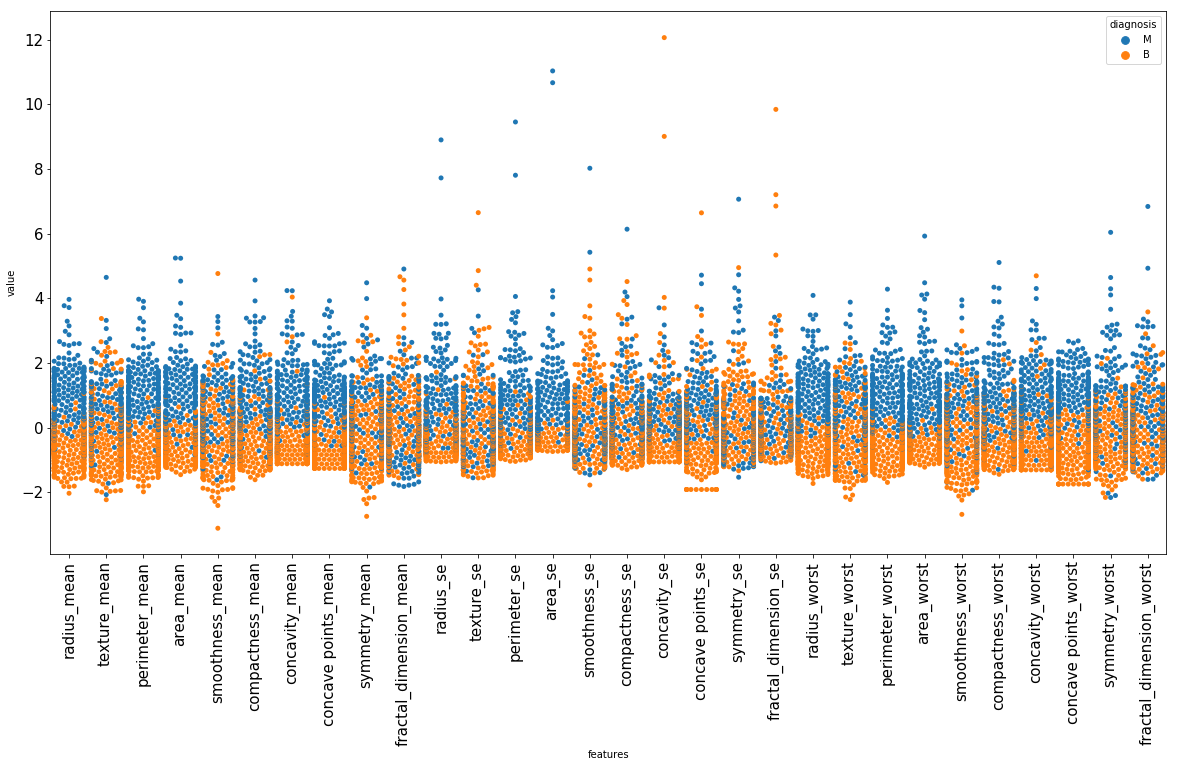

In [49]:
plt.figure(figsize = (20,10))
ax = sns.swarmplot(x="features", y="value", hue= "diagnosis", data=data_trans_melt)
plt.xticks(rotation = 90)
ax.tick_params(labelsize = 15)

__2. Evaluate multi-collinearity through heat map__

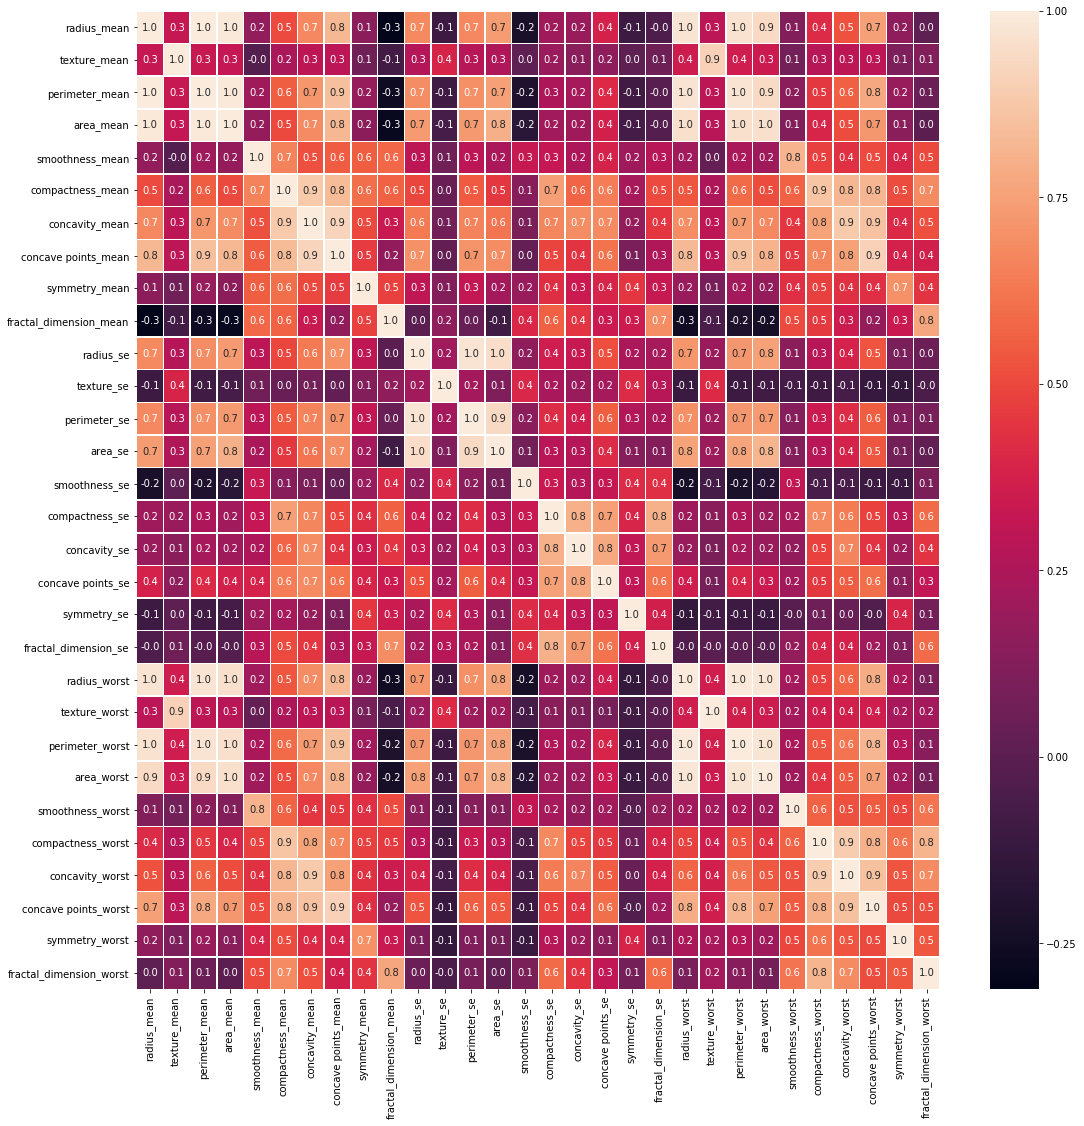

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From the heat map, we can see there are lots of features corelated with each other - multicollinearity . This indicates that we should do feature selection and PCA to address this issue.

__3. PCA to addresss multicollinearity and get benchmark for predictive model performance 

In [144]:
x_trans = data_trans.drop(['diagnosis'], axis=1)
x_trans.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


Text(0.5,1,'Variance explained by PCs')

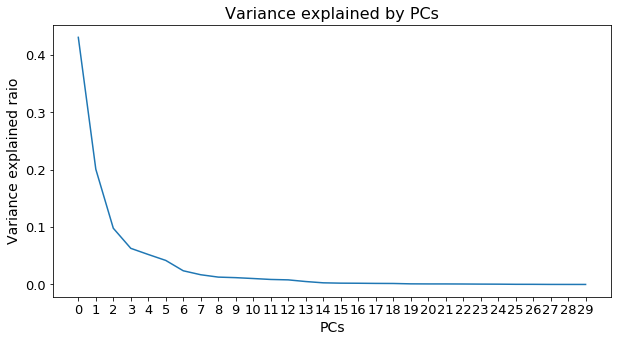

In [145]:
## split the dataset into training and testing
from sklearn.model_selection import train_test_split


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.3, random_state=42)

## PCA on training data and plot the percentage of variance explained
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_train)
plt.figure(figsize = (10,5))
pcs = np.arange(pca.n_components_)
plt.plot(pcs, pca.explained_variance_ratio_)
plt.xticks(pcs, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("PCs", fontsize = 14)
plt.ylabel("Variance explained raio", fontsize = 14)
plt.title("Variance explained by PCs", fontsize = 16)



The first __six__ capture the most variance in data set. We next look at what original features contribute to the first six PCs and they can considered include in the model.

In [146]:
variance_from_feature = pd.DataFrame(pca.components_, columns = list(data)[2:32])
variance_from_feature.T.iloc[:,:6]  ## look at the first six PCs

,0,1,2,3,4,5
radius_mean,0.222656,-0.229404,-0.020918,-0.035382,0.061762,0.023351
texture_mean,0.105219,-0.039244,0.036707,0.611434,-0.048591,-0.080639
perimeter_mean,0.230670,-0.210681,-0.021514,-0.037227,0.061470,0.018937
area_mean,0.229600,-0.229335,0.017267,-0.054361,0.024496,-0.002628
smoothness_mean,0.136608,0.181331,-0.124076,-0.157794,-0.384644,-0.223208
compactness_mean,0.229308,0.162642,-0.078284,-0.041616,0.020095,-0.025489
concavity_mean,0.254258,0.068014,-0.005365,-0.030366,0.096398,-0.033040
concave points_mean,0.257850,-0.026583,-0.047610,-0.062613,-0.033636,-0.038850
symmetry_mean,0.142883,0.180462,-0.057396,-0.026522,-0.231231,0.376004
fractal_dimension_mean,0.054644,0.372087,-0.016567,-0.085780,-0.071313,-0.124309


The top 2 variables of the first six PCs are summarized below. They can be considered to include in the model. <br>
PC1: concavity_mean, concavity points_mean<br>
PC2: fractal_dimension_mean, fractal_dimension_wrost<br>
PC3: texture_se, smootheness_se<br>
PC4: texture_mean, texture_wrost<br>
PC5: smoothness_mean, concavity_se<br>
PC6: symmetry_se, symmetry_wrost<br>

__4. Hand selected features__

Based on the matrix correlation and PCA, I handed selected the following 6 features:<br>
concavity_mean, fractal_dimension_mean, fractal_dimension_wrost, texture_se, smootheness_se, texture_wrost

### Classification Models

__Model I: Logistic regression__

From data exploratory analysis, we know that multi-linearality exists. We exame the performance of using __all data, hand-selected features and sklearn selected feature__ with logistic regession.

_Logistic regression on all features_

In [147]:
## functions to compute the model performance matrix
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
# Helper method to print metric scores    
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [148]:
## convert the y into binary model
y_train_binary = y_train
y_test_binary = y_test
y_train_binary = y_train_binary.replace(['M'], 1)
y_test_binary = y_test_binary.replace(['M'], 1)
y_train_binary = y_train_binary.replace(['B'], 0)
y_test_binary = y_test_binary.replace(['B'], 0)

In [149]:
np.shape(x_train)

(398, 30)

In [150]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#clf = LogisticRegression(C=1.0, penalty='l2')
clf = LogisticRegression()
# Fit a model by providing X and y from training set
clf.fit(x_train, y_train_binary)

# Make prediction on the training data
y_train_pred = clf.predict(x_train)
p_train_pred = clf.predict_proba(x_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(x_test)
p_test_pred = clf.predict_proba(x_test)[:,1]



__1. Logistic regression with full data set__

In [151]:
# print model results
get_performance_metrics(y_train_binary, p_train_pred, y_test_binary, p_test_pred)

              train      test
metrics                      
AUC        0.997143  0.998089
Accuracy   0.987437  0.982456
Precision  0.993151  0.968750
Recall     0.973154  0.984127
f1-score   0.983051  0.976378


__2. Logistic regression with 6 hand-selected features__

In [152]:
#selected_features = [u'texture_se', u'smoothness_se', u'texture_worst']
selected_features = [u'concavity_mean', u'fractal_dimension_mean', u'fractal_dimension_worst', u'texture_se', u'smoothness_se', u'texture_worst']
x_train_handSelected = x_train[selected_features]
x_test_handSelected = x_test[selected_features]
#clf = LogisticRegression(C=1.0, penalty='l2')
clf = LogisticRegression()
# Fit a model by providing X and y from training set
clf.fit(x_train_handSelected, y_train_binary)

# Make prediction on the training data
y_train_pred = clf.predict(x_train_handSelected)
p_train_pred = clf.predict_proba(x_train_handSelected)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(x_test_handSelected)
p_test_pred = clf.predict_proba(x_test_handSelected)[:,1]
get_performance_metrics(y_train_binary, p_train_pred, y_test_binary, p_test_pred)


              train      test
metrics                      
AUC        0.974367  0.981922
Accuracy   0.932161  0.953216
Precision  0.917808  0.936508
Recall     0.899329  0.936508
f1-score   0.908475  0.936508


0.9532163742690059

__3. Logistic regression with cross validation & grid search with all features__

In [ ]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    #plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = LogisticRegression()

# Choose some parameter combinations to try
param_grid = {'C': [0.5,1.5], 
              'max_iter': [50,150]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train_binary)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_



LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
train_test_model(clf, x_train, y_train_binary, x_test, y_test_binary)

              train      test
metrics                      
AUC        0.996631  0.998383
Accuracy   0.984925  0.988304
Precision  0.986395  0.984127
Recall     0.973154  0.984127
f1-score   0.979730  0.984127


__Model II: Random forest__

__1. Random forest with all features__

In [153]:
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier()

# Fit a model by providing X and y from training set
#clf.fit(x_train, y_train)



# Train test model
train_test_model(clf, x_train, y_train_binary, x_test, y_test_binary)

              train      test
metrics                      
AUC        0.999865  0.996032
Accuracy   0.992462  0.953216
Precision  0.986667  0.966102
Recall     0.993289  0.904762
f1-score   0.989967  0.934426


__2. Random forest with hand-selected six features__

In [156]:
clf = RandomForestClassifier()

train_test_train_test_model(clf, x_train_handSelected, y_train_binary, x_test_handSelected, y_test_binary)model(clf, x_train_handSelected, y_train_binary, x_test_handSelected, y_test_binary)

              train      test
metrics                      
AUC        0.999488  0.970018
Accuracy   0.997487  0.918129
Precision  1.000000  0.915254
Recall     0.993289  0.857143
f1-score   0.996633  0.885246


__3.  Random forest with cross validation & grid search__

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
train_test_model(clf, x_train_handSelected, y_train_binary, x_test_handSelected, y_test_binary)

              train      test
metrics                      
AUC        0.999407  0.978395
Accuracy   0.984925  0.912281
Precision  0.979866  0.875000
Recall     0.979866  0.888889
f1-score   0.979866  0.881890


### Model comparison and conclusion

In [ ]:
## plot the performance of two methods

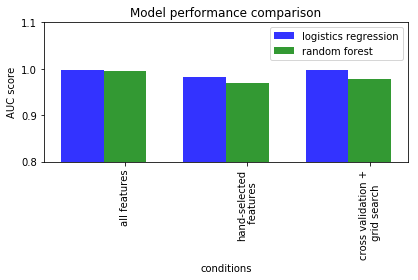

In [187]:
n_methods = 3
auc_log = (0.998089, 0.981922, 0.998383)
auc_ef = (0.996032, 0.970018, 0.978395)

bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots()
index - np.arange(n_methods)
plt.bar(index, auc_log, bar_width, alpha = opacity, color='b',label = "logistics regression" )
plt.bar(index+bar_width, auc_ef, bar_width, alpha = opacity, color='g', label = "random forest" )
plt.xlabel('conditions')
plt.ylabel('AUC score')
plt.title('Model performance comparison')
plt.xticks(index + bar_width, ('all features', 'hand-selected\n features', 'cross validation +\n grid search'), rotation=90)
plt.legend(loc=1)
plt.ylim(0.8,1.1)
 
plt.tight_layout()
plt.show()

- Both models achieve good performance (AUC>0.97) on all conditions
- In general, logistic regression perform bettern than random forest on this data set 
- Reduce number of features lead to lower performance for both logistic regression and random forest